In [4]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import numpy as np
from random import randint
import random
from scipy.stats import entropy

from ortc.utils import *
from ortc.glop_v2 import glop_v2
from ortc.ortc_v2 import ortc_v2
from ortc.ortc_v1 import ortc_v1
from otc.exactOTC import exact_otc
from ortc.entropicORTC import entropic_ortc

In [16]:
def uniform_bipartite_graph():
    while True:
        try:
            A = np.zeros((14, 14))
            right = {}
            for i in range(6, 14):
                right[i] = 0
            for i in range(6):
                if len(right) < 4:
                    raise ValueError("Not enough keys to sample from.")
                
                connect = random.sample(list(right.keys()), 4)
                for j in connect:
                    A[i][j] = 1
                    A[j][i] = 1
                    right[j] += 1
                    if right[j] == 3:
                        del right[j]
            break
        except ValueError:
            continue
    return A

In [21]:
A = uniform_bipartite_graph()

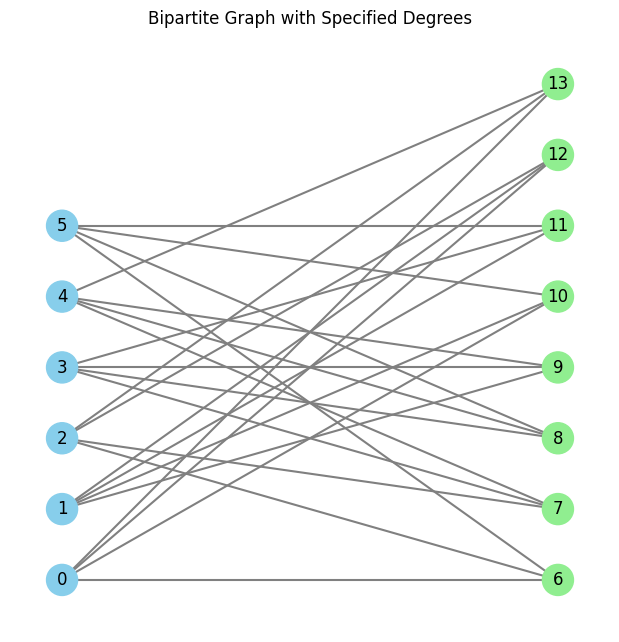

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(A)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
# Identify node sets
left_nodes = list(range(6))
right_nodes = list(range(6, 14))

# Set positions for visualization
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(left_nodes))
pos.update((node, (2, index)) for index, node in enumerate(right_nodes))

# Draw the graph
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=['skyblue'] * 6 + ['lightgreen'] * 8,
    node_size=500,
    edge_color='gray',
    width=1.5
)
plt.title("Bipartite Graph with Specified Degrees")
plt.axis('off')
plt.show()

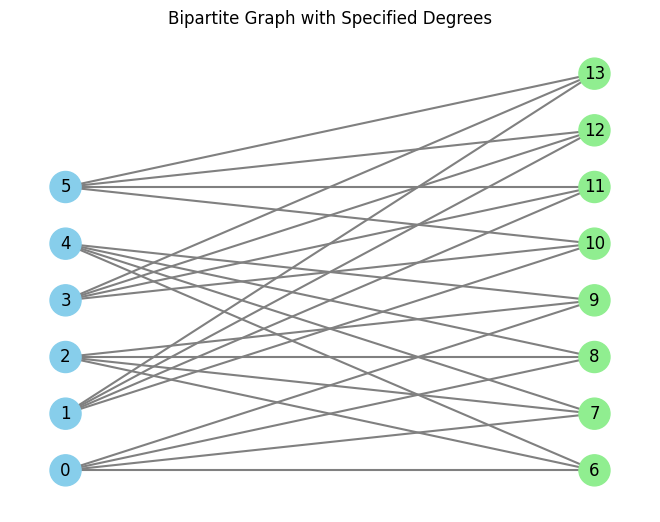

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_bipartite_graph():
    # Degree sequences for the two groups
    left_degrees = [4] * 6   # First group: 6 nodes, each with degree 4
    right_degrees = [3] * 8  # Second group: 8 nodes, each with degree 3

    # Create the bipartite graph using the Havel-Hakimi algorithm
    B = nx.bipartite.havel_hakimi_graph(left_degrees, right_degrees)

    # Identify node sets
    left_nodes = list(range(6))
    right_nodes = list(range(6, 14))

    # Set positions for visualization
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(left_nodes))
    pos.update((node, (2, index)) for index, node in enumerate(right_nodes))

    # Draw the graph
    nx.draw(
        B,
        pos,
        with_labels=True,
        node_color=['skyblue'] * 6 + ['lightgreen'] * 8,
        node_size=500,
        edge_color='gray',
        width=1.5
    )
    plt.title("Bipartite Graph with Specified Degrees")
    plt.axis('off')
    plt.show()

# Call the function to draw the graph
draw_bipartite_graph()


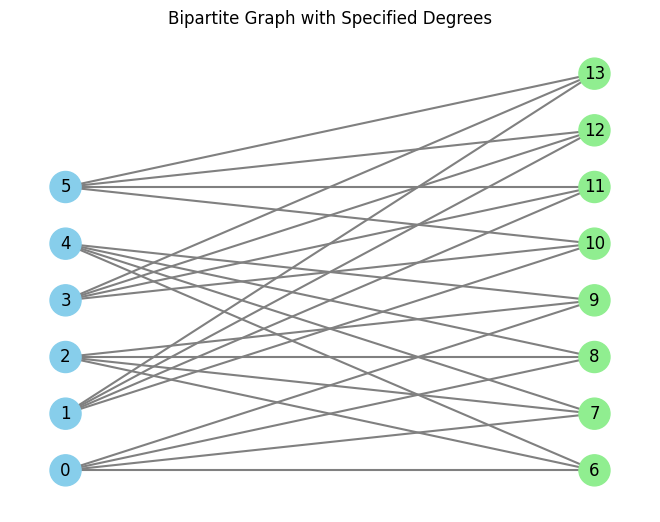

In [2]:
# Call the function to draw the graph
draw_bipartite_graph()


In [2]:
A1 = np.zeros((13, 13))
A1[0, 1] = 1
A1[0, 2] = 1
A1[0, 3] = 1
A1[1, 4] = 1
A1[2, 4] = 1
A1[3, 4] = 1
A1[4, 5] = 1
A1[4, 6] = 1
A1[4, 7] = 1
A1[5, 8] = 1
A1[6, 8] = 1
A1[7, 8] = 1
A1[8, 9] = 1
A1[8, 10] = 1
A1[8, 11] = 1
A1[9, 12] = 1
A1[10, 12] = 1
A1[11, 12] = 1
A1 = A1 + A1.T

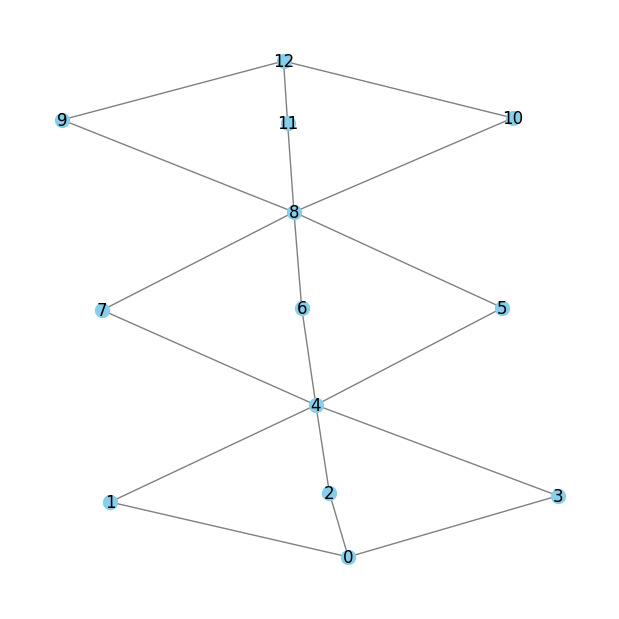

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(A1)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, font_size=12, edge_color='gray')
plt.show()

In [4]:
arr_extracted = np.r_[0:6, 7:13] 

In [5]:
A2 = A1[np.ix_(arr_extracted, arr_extracted)]

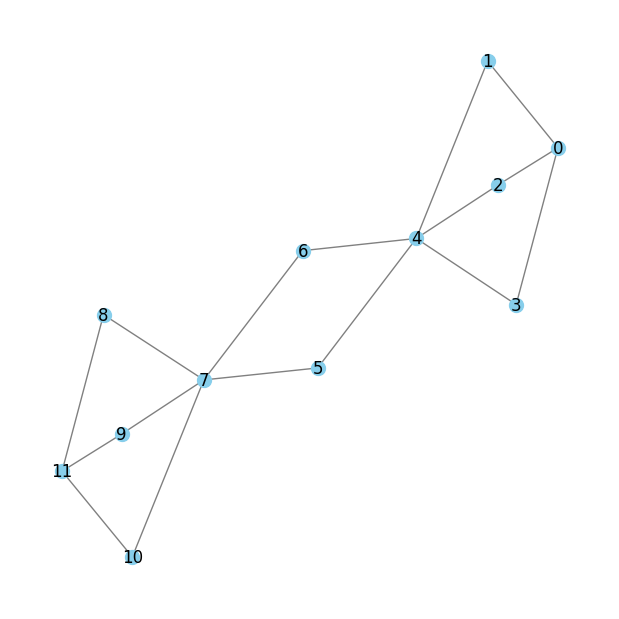

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(A2)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, font_size=12, edge_color='gray')
plt.show()

In [7]:
def independent_weight_couplings(A1, A2):
    dx = A1.shape[0]
    dy = A2.shape[0]
    w = np.zeros((dx,dy,dx,dy))
    for i in range(dx):
        for j in range(dy):
            for k in range(dx):
                w[i,j,k,:] = A1[i,k]*A2[j,:]
    return w

In [10]:
c = get_degree_cost(A1, A2)

A1 /= np.sum(A1)
A2 /= np.sum(A2)
# Get cost function
w_indep = independent_weight_couplings(A1,A2)
d = np.sum(w_indep, axis=(2, 3))
cost_indep = np.sum(d * c)
print(cost_indep)

_, cost, weight = glop_v2(A1, A2, c, vertex=True)
print(cost)

_, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.01, 10000, 1e-10)
print(entropic_cost)

# kl_divergence.append(entropy(d.flatten(), d_ortc.flatten()))

0.0042016300154321
0.0012719425154320994
0.0027848897263695175
